In [48]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as ts

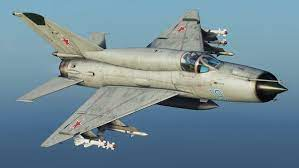

In [49]:
img = image.load_img('data/nn/training/jets/1.jpg')
img

In [50]:
cv2.imread('data/nn/training/jets/1.jpg').shape

(168, 299, 3)

In [51]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)


In [52]:
path = 'data/nn/training'
train_dataset = train.flow_from_directory(path, target_size=(200,200), batch_size=3, class_mode='binary')
train_dataset.class_indices

Found 28 images belonging to 2 classes.


{'jets': 0, 'logiczero': 1}

In [53]:
path = 'data/nn/validation'
validation_data = train.flow_from_directory(path, target_size=(200, 200), batch_size=3)

Found 12 images belonging to 2 classes.


In [54]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [55]:
model = ts.keras.models.Sequential([
    ts.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    ts.keras.layers.MaxPool2D(2, 2),
    ts.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    ts.keras.layers.MaxPool2D(2, 2),
    ts.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    ts.keras.layers.MaxPool2D(2, 2),
    ts.keras.layers.Flatten(),
    ts.keras.layers.Dense(1, activation='sigmoid')
])


In [56]:
model.compile(loss='binary_crossentropy', optimizer=ts.keras.optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [57]:
model_fit = model.fit(train_dataset, epochs=20, validation_data=validation_data)

Epoch 1/20
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2914 - loss: 1.5085    

/Users/rishavbhagat/Developer/AI/myenv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3484 - loss: 1.4231

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 2), output.shape=(None, 1)